In [1]:
from __future__ import absolute_import, division, print_function
#
import tensorflow as tf
#
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
# 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_shape = (28*28,) # 784
intermediate_dim_1 = 128
intermediate_dim_2 = 64
intermediate_dim_3 = 32
intermediate_dim_4 = 16
latent_dim = 2 
    
# Train parameters
epochs = 3
batch_size=64

In [4]:
# Define encoder model
inputs = Input(shape=input_shape,name='encoder_input')
x = Activation('relu')(inputs)
x = Dense(intermediate_dim_1, name='hidden_layer_1_e')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_2, name='hidden_layer_2_e')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_3, name='hidden_layer_3_e')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_4, name='hidden_layer_4_e')(x)
x = Activation('relu')(x)
outputs = Dense(latent_dim, name='latent_space')(x)
#outputs = LayerNormalization(axis=1)(x)

encoder = Model(inputs=inputs, outputs=outputs, name='dense_encoder')

encoder.summary()

Model: "dense_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 784)]             0         
                                                                 
 activation_5 (Activation)   (None, 784)               0         
                                                                 
 hidden_layer_1_e (Dense)    (None, 128)               100480    
                                                                 
 activation_6 (Activation)   (None, 128)               0         
                                                                 
 hidden_layer_2_e (Dense)    (None, 64)                8256      
                                                                 
 activation_7 (Activation)   (None, 64)                0         
                                                                 
 hidden_layer_3_e (Dense)    (None, 32)              

In [5]:
# Define decoder model
latent_input = Input(shape = (latent_dim,), name='decoder_input')
x = Activation('relu')(latent_input)
x = Dense(intermediate_dim_4 , name='hidden_layer_de_4_d')(latent_input)
x = Activation('relu')(x)
x = Dense(intermediate_dim_3 , name='hidden_layer_de_3_d')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_2 , name='hidden_layer_de_2_d')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_1 , name='hidden_layer_de_1_d')(x)
x = Activation('relu')(x)
x = Dense(input_shape[0], name='original_space')(x)
x = Activation('sigmoid')(x)

decoder = Model (inputs=latent_input, outputs=x, name='decoder')

decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder_input (InputLayer)  [(None, 2)]               0         
                                                                 
 hidden_layer_de_4_d (Dense)  (None, 16)               48        
                                                                 
 activation_11 (Activation)  (None, 16)                0         
                                                                 
 hidden_layer_de_3_d (Dense)  (None, 32)               544       
                                                                 
 activation_12 (Activation)  (None, 32)                0         
                                                                 
 hidden_layer_de_2_d (Dense)  (None, 64)               2112      
                                                                 
 activation_13 (Activation)  (None, 64)                0   

In [6]:
# Autoencoder Model
autoencoder = Model(inputs=inputs, 
                    outputs=decoder(encoder(inputs)),
                    name='autoencoder_mnist_model')

#Summary
autoencoder.summary()

Model: "autoencoder_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 784)]             0         
                                                                 
 dense_encoder (Functional)  (None, 2)                 111378    
                                                                 
 decoder (Functional)        (None, 784)               112160    
                                                                 
Total params: 223,538
Trainable params: 223,538
Non-trainable params: 0
_________________________________________________________________


In [7]:
optimizer = Adam(learning_rate=1e-3)
loss_fn = MeanSquaredError()
autoencoder.compile(optimizer= optimizer, loss = loss_fn)

In [8]:
# Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

epochs = 20
batch_size = 64

In [9]:
# Train
history = autoencoder.fit(x_train, x_train, epochs = epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/20
844/844 [==============================] - 16s 10ms/step - loss: 0.0601 - val_loss: 0.0484
Epoch 2/20
844/844 [==============================] - 7s 9ms/step - loss: 0.0462 - val_loss: 0.0432
Epoch 3/20
844/844 [==============================] - 7s 8ms/step - loss: 0.0428 - val_loss: 0.0411
Epoch 4/20
844/844 [==============================] - 8s 10ms/step - loss: 0.0411 - val_loss: 0.0395
Epoch 5/20
844/844 [==============================] - 9s 10ms/step - loss: 0.0400 - val_loss: 0.0387
Epoch 6/20
844/844 [==============================] - 8s 9ms/step - loss: 0.0392 - val_loss: 0.0382
Epoch 7/20
844/844 [==============================] - 9s 11ms/step - loss: 0.0387 - val_loss: 0.0377
Epoch 8/20
844/844 [==============================] - 9s 10ms/step - loss: 0.0381 - val_loss: 0.0377
Epoch 9/20
844/844 [==============================] - 8s 10ms/step - loss: 0.0379 - val_loss: 0.0373
Epoch 10/20
844/844 [==============================] - 8s 10ms/step - loss: 0.0375 - val_loss

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch 
hist.tail()

,loss,val_loss,epoch
15,0.036368,0.036045,15
16,0.036121,0.035497,16
17,0.036046,0.035579,17
18,0.035882,0.035625,18
19,0.035779,0.035334,19


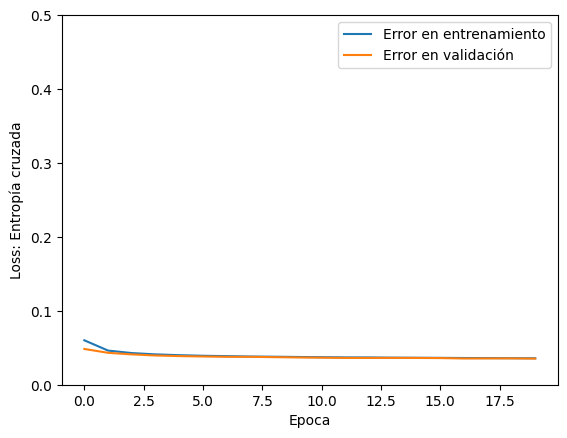

In [11]:
plt.figure()
plt.xlabel('Epoca')
plt.ylabel('Loss: Entropía cruzada')
plt.plot(hist['epoch'], hist['loss'],
           label='Error en entrenamiento')
plt.plot(hist['epoch'], hist['val_loss'],
           label='Error en validación')
plt.ylim([0,0.5])
plt.legend()
plt.show()

In [12]:
# External evaluation
autoencoder.evaluate(x_test,x_test) # 0.0361
autoencoder.evaluate(x_train,x_train) # 0.0358

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0354


0.03542102128267288

In [13]:
def reconstruction_image(img_original, img_decoded, image_size=28, num_images=8, random=True, file_name=None):
    
    # control number of images, maximum is  16. 
    if num_images > 16:
        num_images = 16
    
    # select images
    if random:
        shape_0 = img_original.shape[0]
        index = np.random.randint(low=0, high=shape_0, size=num_images)
    else:
        index = range(num_images) # first images
    
    # prepare data
    imgs = np.concatenate([img_original[index], img_decoded[index]])
    imgs = imgs.reshape((2, num_images, image_size, image_size))
    imgs = np.vstack([np.hstack(i) for i in imgs])
    
    # plot
    plt.axis('off')
    plt.title('Entrada: Primera Fila, Decodificado: Segunda fila')
    plt.imshow(1-imgs, interpolation='none', cmap='gray')
    if file_name is not None:
        plt.savefig(file_name)
    plt.show()
   

In [18]:
import os

# Verificar si el directorio existe, si no, crearlo
directory = '../Imagenes/'
if not os.path.exists(directory):
    os.makedirs(directory)


313/313 [==============================] - 1s 4ms/step


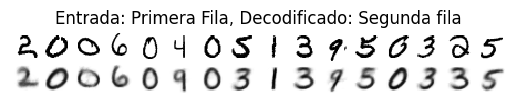

In [19]:
file_name = '../Imagenes/input_and_decoded.png'
reconstruction_image(img_original= x_test, img_decoded=autoencoder.predict(x_test), 
                         image_size=28, num_images= 20, random=True,
                         file_name=file_name)

In [15]:
def plot2D(x_latent, y_label,
           sample_percent = 100, #show 100% by default
           xmin=-4.0, ymin=-4.0,
           xmax=4.0,  ymax=4.0,
           filename=None,
           xlabel='Dim 1',
           ylabel='Dim 2',
           title='Latent Space-2D'):
    
    
    # select sample to reduce the data
    if sample_percent>=100:
        sample_percent= 100
    elif sample_percent<=0:
        sample_percent= 10
    if sample_percent!=100:
        shape_0 = x_latent.shape[0]
        size = int(shape_0*sample_percent/100)
        index = index = np.random.randint(low=0, high=shape_0, size=size)
        z = x_latent[index]
        y_test = y_label[index]
    else:
        z = x_latent
        y_test = y_label
    
    
    # configure the plot
    #fig, ax = plt.subplots(figsize=(20, 16))
    fig = plt.figure(figsize=(20, 16))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlim([xmin,xmax])
    ax.set_ylim([ymin,ymax])
    ax.set_xlabel(xlabel,fontsize=12)
    ax.set_ylabel(ylabel,fontsize=12)
    ax.set_title(title,fontsize=15)
    ax.grid(True)
    
    # plot
    #plt.scatter(z[:, 0], z[:, 1], marker="")
    ax.scatter(z[:, 0], z[:, 1], c=y_label ,alpha=0.1, edgecolors='none')
    for i, digit in enumerate(y_test):
        ax.annotate(digit, (z[i, 0], z[i, 1]))
   
    # save the plot
    if filename is not None:
        plt.savefig(filename)
    #plt.show()
    
   

In [16]:
# extract encoding data to future use
x_train_latent = encoder(x_train)
x_train_latent = x_train_latent.numpy()

x_test_latent = encoder(x_test)
x_test_latent = x_test_latent.numpy()

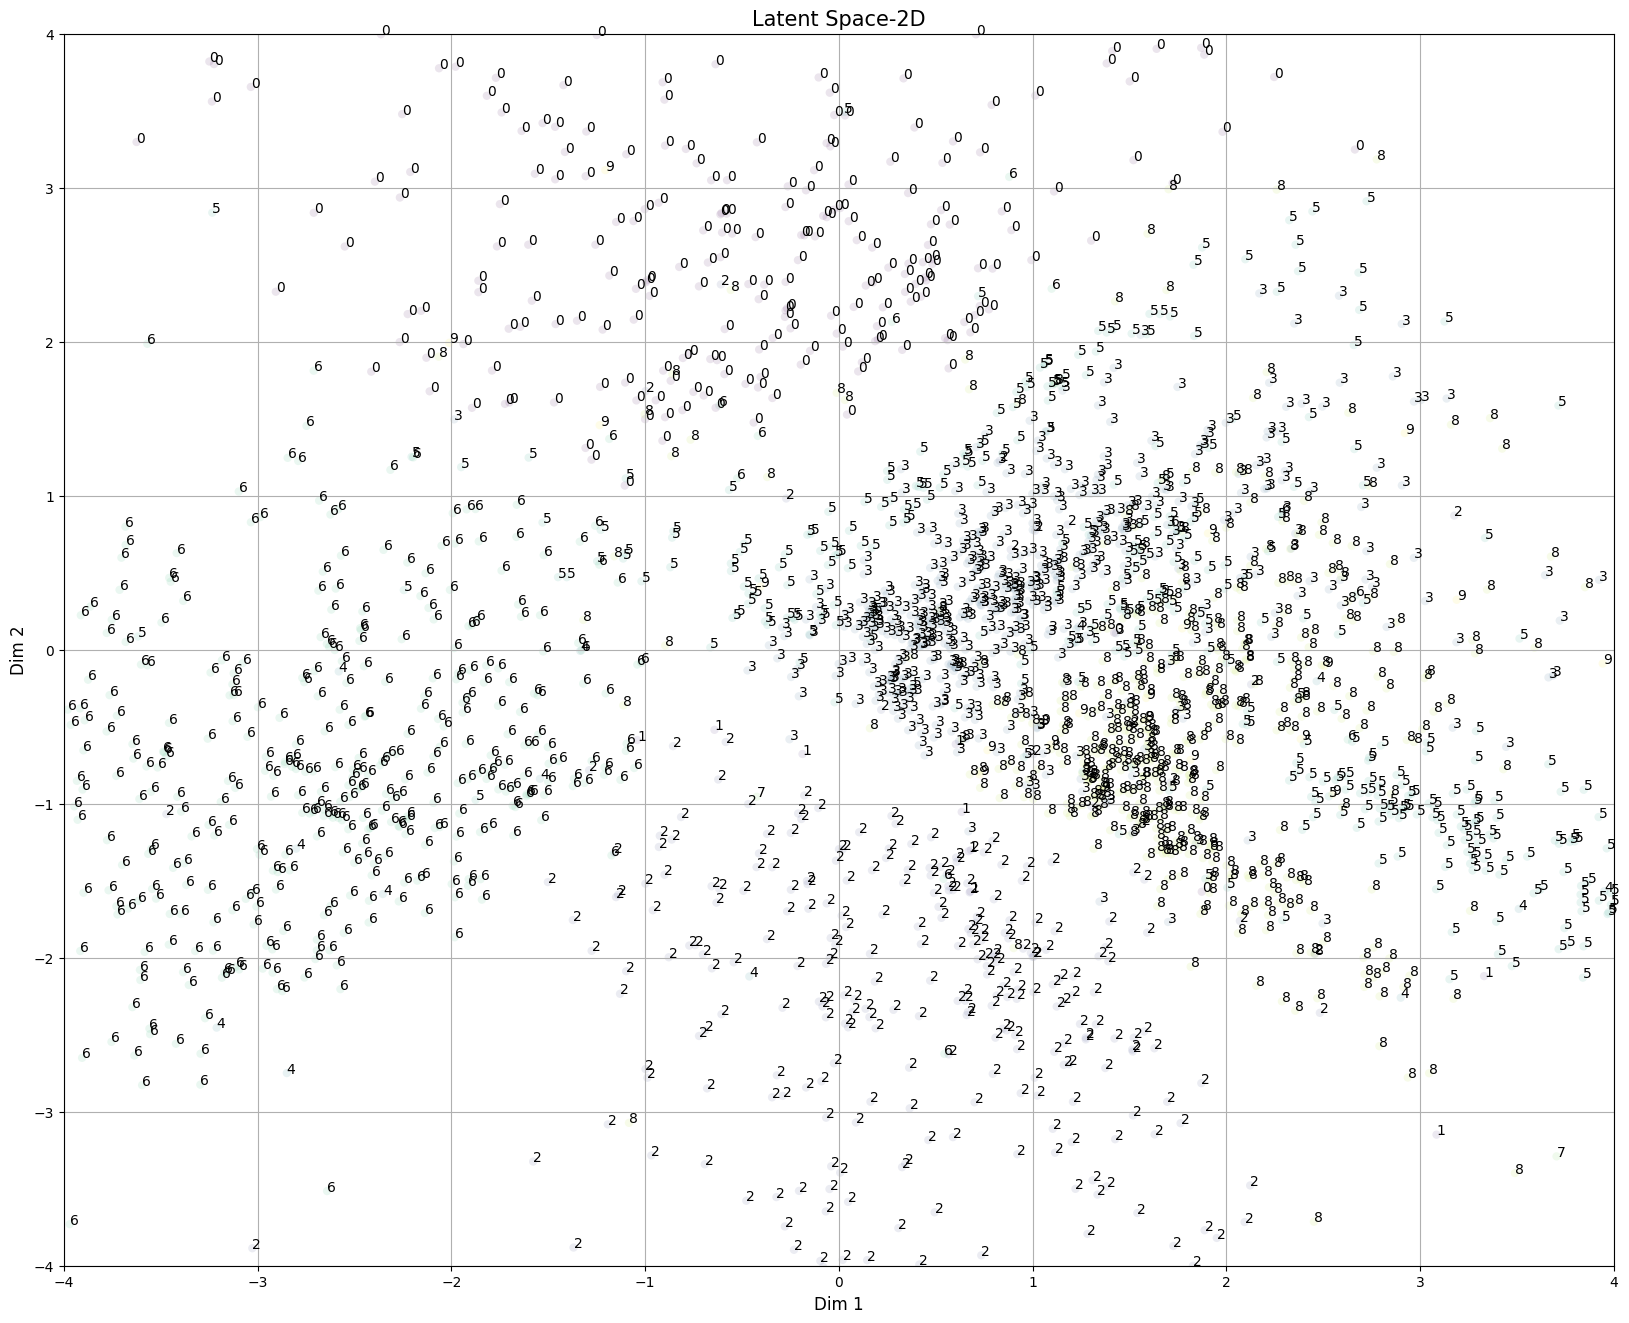

In [20]:
filename='../Imagenes/latent_2D_space_minist.png'
plot2D(x_test_latent[0::2], y_test[0::2], filename=filename)# Comienza en el índice 0 toma cada dos posiciones